# Başlıklar

* [Veri Seti](#Veri-Seti)
    * [Veri Seti Tanımı](#Veri-Seti-Tanımı)
    * [Veri Setine Genel Bakış](#Veri-Setine-Genel-Bakış)
    * [Veri Setinin Görselleştirilmesi](#Veri-Setinin-Görselleştirilmesi)
    * [Kayıp Değer Analizi](#Kayıp-Değer-Analizi)
    * [Veri Ön İşleme](#Veri-Ön-İşleme)
* [Topluluk Öğrenmesi](#Topluluk-Öğrenmesi-(Ensemble-Learning))
    * [Basit Topluluk Teknikleri](#Basit-Topluluk-Teknikleri)
        * [Max Voting](#Max-Voting)
        * [Averaging](#Averaging)
        * [Weighted Average](#Weighted-Average)
    * [Gelişmiş Topluluk Teknikleri](#Gelişmiş-Topluluk-Teknikleri)
        * [Stacking](#Stacking)
        * [Blending](#Blending)
        * [Bagging](#Bagging)
        * [Boosting](#Boosting)
    * [Bagging ve Boosting Kullanan Algoritmalar](#Bagging-ve-Boosting-Kullanan-Algoritmalar)
        * [Bagging meta-estimator](#Bagging-meta-estimator)
        * [Random Forest](#Random-Forest)
        * [Gradient Boosting](#Gradient-Boosting)
        * [XGBoost](#XGBoost)
        * [LightGBM](#LightGBM)
        * [CatBoost](#CatBoost)
* [Sonuç](#Sonuç:)
* [Kaynaklar](#Kaynaklar)

# Veri Seti

## Veri Seti Tanımı

15 Nisan 1912'de, ilk yolculuğu sırasında Titanic bir buzdağına çarparak battı ve 2224 yolcu ve mürettebattan 1502'sini öldürdü. Bu sansasyonel trajedi, uluslararası toplumu şok etti ve gemiler için daha iyi güvenlik düzenlemelerine yol açtı. Kazanın bu kadar can kaybına yol açmasının nedenlerinden biri, yolcular ve mürettebat için yeterli cankurtaran botunun olmamasıydı. Batarken hayatta kalmanın bir takım şans unsuru olmasına rağmen, kadınlar, çocuklar ve üst sınıflar gibi bazı grupların hayatta kalma olasılığı diğerlerinden daha fazlaydı. Bu olayda, ne tür insanların hayatta kalma olasılığının yüksek olduğunu tahmin edeceğiz. Özellikle, trajediden hangi yolcuların hayatta kaldığını tahmin etmek için makine öğrenimi araçlarını uygulayacağız.

### Hedef

Yolcuların kaza sonucu yaşayıp yaşamadığını tahmin edelim. Hedef değişkenimiz 'Survived'. Hayatta kalanlar 1 ölenler 0 değerini alıyor.


### Değişkenlerin Tanımları

* Survived : Hayatta kalan (1) ya da ölen(0)
* Pclass : Yolcu sınıfı
* Name : Yolcu ismi
* Sex : Yolcu cinsiyeti
* Age : Yolcu yaşı
* SibSp : Gemideki kardeş/eş sayısı
* Parch : Gemideki ebeveyn/çocuk sayısı
- Ticket : Ticket Number
- Fare : Ücret
- Cabin : Kabin
- Embarked : Liman

## Gerekli Kütüphanelerin Kurulumu ve Veri Setinin Yüklenmesi

In [1]:
# !pip install scikit-learn==0.21rc2
import pandas as pd # veri analizi araçları
import numpy as np # hesaplama araçları
from matplotlib import pyplot as plt #görselleştirme
import seaborn as sns # görselleştirme
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

df = pd.read_csv('titanic.csv',sep=',')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Veri Setine Genel Bakış

In [2]:
df.shape  # df setinin boyutları

(891, 12)

In [3]:
df.columns # değişkenler

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.describe().T #betimsel istatistikler

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [5]:
df.dtypes #değişkenlerin veri tipler

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Bu değişkenlerden Cabin ve Ticket string tipinde ifade edilmiştir.

Sex değişkeni binary category tipindedir Embarked değişkeni category tipindedir Name değişkeni text tipindedir

Pclass, Age, PassengerID, SibSp, Parch, Fare olmak üzere 6 değişken nümeric türündendir<br>

Age ve Fare değişkenleri sürekli sayısal Pclass değişkeni ordinal category tipindedir 

SibSp ve Parch değişkenleri discrete ordinal Hedef değişken olan Survived değişkeni binary categorical

##### Hayatta kalma oranı

In [6]:
df['Survived'].mean()

0.3838383838383838

##### Cinsiyete Göre Hayatta Kalma Oranı

In [7]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

## Veri Setinin Görselleştirilmesi


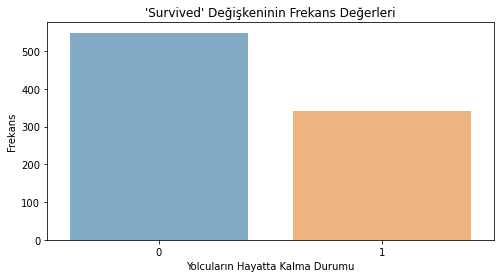

In [8]:
plt.figure(figsize=(8,4))
Survived = df["Survived"].value_counts()
sns.barplot(y=Survived.values, x=Survived.index, alpha=0.6)
plt.title("'Survived' Değişkeninin Frekans Değerleri")
plt.xlabel('Yolcuların Hayatta Kalma Durumu', fontsize=10)
plt.ylabel('Frekans', fontsize=10)
plt.show()

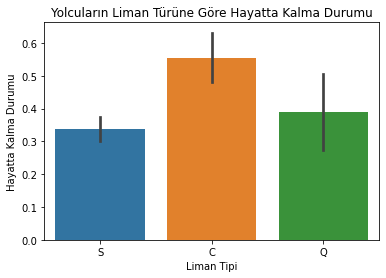

In [9]:
sns.barplot(df['Embarked'], df['Survived'])
plt.title("Yolcuların Liman Türüne Göre Hayatta Kalma Durumu")
plt.xlabel('Liman Tipi', fontsize=10)
plt.ylabel('Hayatta Kalma Durumu', fontsize=10)
plt.show()

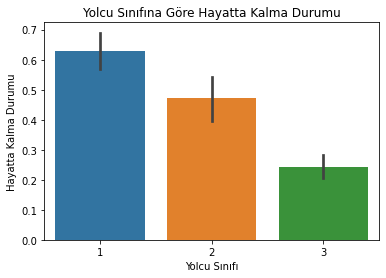

In [10]:
sns.barplot(df['Pclass'], df['Survived'])
plt.title("Yolcu Sınıfına Göre Hayatta Kalma Durumu")
plt.xlabel('Yolcu Sınıfı', fontsize=10)
plt.ylabel('Hayatta Kalma Durumu', fontsize=10)
plt.show()

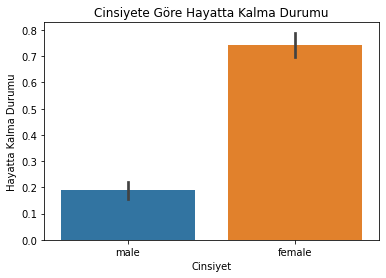

In [11]:
sns.barplot(df['Sex'], df['Survived'])
plt.title("Cinsiyete Göre Hayatta Kalma Durumu")
plt.xlabel('Cinsiyet', fontsize=10)
plt.ylabel('Hayatta Kalma Durumu', fontsize=10)
plt.show()

# Kayıp Değer Analizi


In [12]:
# veri setinde eksik değerleri olan sütunları listele
df.columns[df.isna().any()]


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

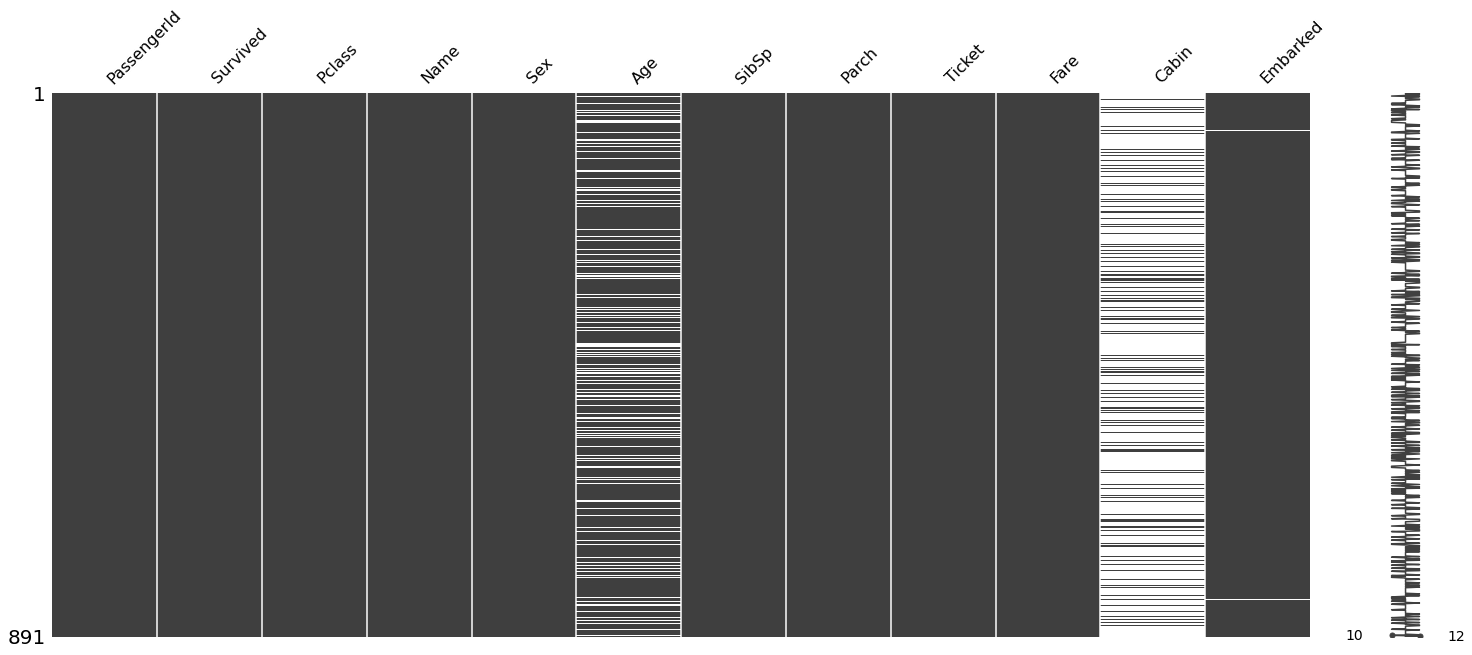

In [13]:
#pip install missingno
import missingno as msno
msno.matrix(df);

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# eksik değerleri Embarked için mode ile doldurma
embarked = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(embarked)

In [16]:
# Cabin değişkeninin çok büyük oranda eksik değer içermesinden dolayı veri setinden silindi.

df.drop("Cabin", axis = 1, inplace = True)


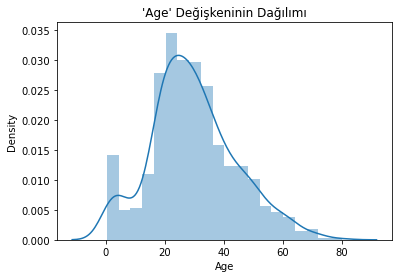

In [17]:
# Age değişkeni için çeşitli veri doldurma yöntemlerini uygulayalım.
# ilk olarak dağılımına bakalım
sns.distplot(df["Age"])
plt.title("'Age' Değişkeninin Dağılımı")
plt.show()

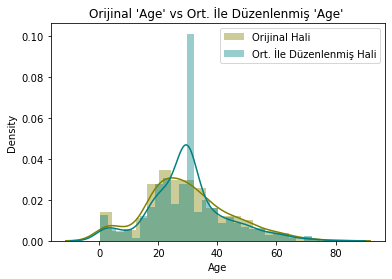

In [18]:
# mean ile dolduralım
df_mean = df.copy()
mean_age = df["Age"].mean() # ortalama yaş değeri
df_mean['Age'] = df_mean["Age"].fillna(np.round(mean_age,1))

sns.distplot(df["Age"],color="olive", label="Orijinal Hali")
sns.distplot( df_mean["Age"],color="teal", label="Ort. İle Düzenlenmiş Hali")
plt.title("Orijinal 'Age' vs Ort. İle Düzenlenmiş 'Age' ")
plt.legend()
plt.show()



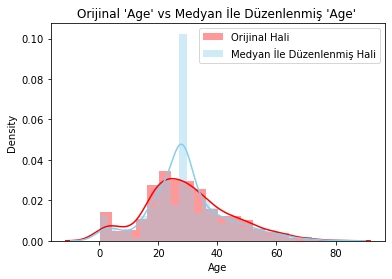

In [19]:
# median ile dolduralım

df_median = df.copy()
median_age = df["Age"].median()
df_median["Age"] = df_median["Age"].fillna(median_age)

sns.distplot(df["Age"] , color="red", label="Orijinal Hali")
sns.distplot(df_median["Age"] , color="skyblue", label="Medyan İle Düzenlenmiş Hali")
plt.title("Orijinal 'Age' vs Medyan İle Düzenlenmiş 'Age' ")
plt.legend()
plt.show()

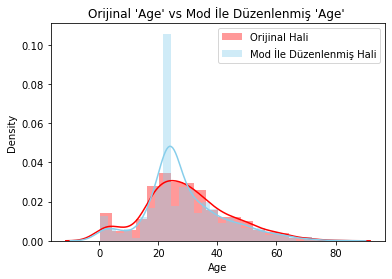

In [20]:
# mod ile dolduralım
df_mode = df.copy()
age_mode = df["Age"].mode()[0] # modunu bulma
df_mode["Age"] = df_mode["Age"].fillna(age_mode)

sns.distplot(df["Age"] , color="red", label="Orijinal Hali")
sns.distplot(df_mode["Age"] , color="skyblue", label="Mod İle Düzenlenmiş Hali")
plt.title("Orijinal 'Age' vs Mod İle Düzenlenmiş 'Age' ")
plt.legend()
plt.show()

In [21]:
# Veri dağılımından harektle mean ile doldurmaya karar verildi.

df["Age"] = df["Age"].fillna(np.round(mean_age,1))


# Veri Ön İşleme

### Kategorik değişkeni sayısal değerlere dönüştürme

In [22]:
# 1 CİNSİYET DEĞİŞKENİ İÇİN ANALİZ
# Binary encoding

df["Sex"] = df["Sex"].map({"male":0, "female":1}).astype(int)


In [23]:
# EMBARKED Değişkeni İçin Analiz

southampton = df[df["Embarked"] == "S"].shape[0]
print("Southampton(S)'dan binen yolcu sayısı:",southampton)

cherbourg = df[df["Embarked"] == "C"].shape[0]
print("Cherbourg (C)'dan binen yolcu sayısı:",cherbourg)

queenstown = df[df["Embarked"] == "Q"].shape[0]
print("Queenstown(Q)'dan binen yolcu sayısı:",queenstown )


Southampton(S)'dan binen yolcu sayısı: 646
Cherbourg (C)'dan binen yolcu sayısı: 168
Queenstown(Q)'dan binen yolcu sayısı: 77


In [24]:
from sklearn.preprocessing import OneHotEncoder

# embarked değişkeni ordinal bir yapıda olmadığından one hot encoder kullanılabilir.

encoder = OneHotEncoder()
encoder_df = pd.DataFrame(encoder.fit_transform(df[["Embarked"]]).toarray()).add_prefix('Embarked_')
df = df.join(encoder_df)

In [25]:
encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [26]:
# Name Değişkeni İçin Analiz:
import re

In [27]:
def make_title(df):
    for dataset in df:
        dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

make_title([df])    

In [28]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [29]:
pd.crosstab(df['Title'], df['Sex'])


Sex         0    1
Title             
Capt        1    0
Col         2    0
Countess    0    1
Don         1    0
Dr          6    1
Jonkheer    1    0
Lady        0    1
Major       2    0
Master     40    0
Miss        0  182
Mlle        0    2
Mme         0    1
Mr        517    0
Mrs         0  125
Ms          0    1
Rev         6    0
Sir         1    0

In [30]:
# Veri setinde yer alan name değişkeninde bulanan unvanları daha genel kullanımına 
# göre replace metoduyla değiştirelim ve hayatta kalma durumuna göre gruplayalım

def Title_arange(df):
    for dataset in df:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

        #train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [31]:
Title_arange([df])


In [32]:
encoder = OneHotEncoder()

encoder_df = pd.DataFrame(encoder.fit_transform(df[["Title"]]).toarray()).add_prefix('Title_')
df = df.join(encoder_df)


In [33]:
# Daha sonra Name, Embarked, Ticket değişkenini silelim


df = df.drop(["PassengerId","Name","Ticket","Embarked","Title"], axis= 1)


In [34]:
encoder.categories_

[array(['Master', 'Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)]

In [35]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_0  Embarked_1  \
0         0       3    0  22.0      1      0   7.2500         0.0         0.0   
1         1       1    1  38.0      1      0  71.2833         1.0         0.0   
2         1       3    1  26.0      0      0   7.9250         0.0         0.0   
3         1       1    1  35.0      1      0  53.1000         0.0         0.0   
4         0       3    0  35.0      0      0   8.0500         0.0         0.0   

   Embarked_2  Title_0  Title_1  Title_2  Title_3  Title_4  
0         1.0      0.0      0.0      1.0      0.0      0.0  
1         0.0      0.0      0.0      0.0      1.0      0.0  
2         1.0      0.0      1.0      0.0      0.0      0.0  
3         1.0      0.0      0.0      0.0      1.0      0.0  
4         1.0      0.0      0.0      1.0      0.0      0.0

### VERİ SETİNİ TRAİN TEST VE VALİDATİON OLARAK AYIRALIM

In [36]:
y = df["Survived"]

X = df.drop(["Survived"], axis = 1)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=44) 
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)
y_val.reset_index(inplace=True,drop=True)

# Topluluk Öğrenmesi (Ensemble Learning)

Topluluk öğrenme kavramını bir örnekle anlayalım. Bir film yönetmeni olduğunuzu ve çok önemli ve ilginç bir konu hakkında kısa bir film hazırladığınızı varsayalım. Şimdi, filmi herkese açık hale getirmeden önce ön geri bildirim (derecelendirme) almak istiyorsunuz. Bunu yapmanın olası yolları nelerdir?

* A: Bir arkadaşınızdan filmi sizin için değerlendirmesini isteyebilirsiniz.

Bu durumda arkadaşınızın sizi çok sevmesi ve yarattığınız korkunç çalışmaya 1 yıldız vererek kalbinizi kırmak istememesi tamamen mümkün.

* B: Başka bir yol da 5 meslektaşınızdan filmi derecelendirmelerini istemek olabilir.

Bu yöntem, filminiz için dürüst derecelendirmeler sağlayabilir. Ama hala bir sorun var. Bu 5 kişi, filminizin konusu için “Konu Uzmanı” olmayabilir.

* C: Ya 50 kişiden filmi değerlendirmesini istersek ?

Bazıları arkadaşınız olabilir, bazıları meslektaşlarınız olabilir ve hatta bazıları tamamen yabancı olabilir. Bu durumda yanıtlar, artık farklı becerilere sahip insanlara sahip olduğunuz için daha genel ve çeşitli olacaktır. Bu örneklerle, farklı bir grup insanın, bireylere kıyasla daha iyi kararlar verebileceği sonucuna varabilirsiniz. Tekli modellere kıyasla çok çeşitli modeller için benzer durum geçerlidir. Makine Öğrenimindeki bu çeşitlilik, Topluluk Öğrenimi adı verilen bir teknikle elde edilir. Artık topluluk öğreniminin ne olduğu konusunda bir fikir edindiğinize göre, bunların uygulamalarıyla birlikte topluluk öğrenmedeki çeşitli tekniklere bakalım.

![title](elephant.png)

# Basit Topluluk Teknikleri

Bu bölümde, birkaç basit ama güçlü tekniğe bakacağız, yani:
    
* Max Voting
* Averaging
* Weighted Averaging

## Max Voting

Maksimum oylama yöntemi genellikle sınıflandırma problemleri için kullanılır. Bu teknikte, her veri noktası için tahmin yapmak için birden çok model kullanılır. Her modelin tahminleri bir 'oy' olarak kabul edilir. Modellerin çoğundan aldığımız tahminler son tahmin olarak kullanılmaktadır.

Örneğin, 5 meslektaşınızdan filminizi derecelendirmesini istediğinizde (5 üzerinden); Bunlardan üçünün 4, ikisinin de 5 verdiğini varsayacağız. Çoğunluk 4 puan verdiği için final derecesini 4 olarak alabiliriz. Bunu tüm tahminlerin modunu almak olarak düşünebilirsiniz.

![title](maxvoting.png)

### Örnek Kod:

In [38]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=10)
model2 = DecisionTreeClassifier(random_state=10)
model3 = KNeighborsClassifier()

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('kn', model3)], voting='hard')
model.fit(X_train,y_train)
model.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

## Averaging

Maksimum oylama tekniğine benzer şekilde, ortalamada her veri noktası için birden fazla tahmin yapılır. Bu yöntemde, tüm modellerden ortalama bir tahmin alıyoruz ve bunu son tahmini yapmak için kullanıyoruz. Ortalama alma, regresyon problemlerinde tahmin yapmak için veya sınıflandırma problemleri için olasılıkları hesaplarken kullanılabilir.

Örneğin, aşağıdaki durumda, ortalama alma yöntemi tüm değerlerin ortalamasını alacaktır. 

yani (5 + 4 + 5 + 4 + 4) / 5 = 4.4

![title](averaging.png)

### Örnek Kod:

In [39]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

finalpred=(pred1+pred2+pred3)/3
print(finalpred)

[1.         0.         0.66666667 1.         1.         0.
 0.         1.         0.66666667 0.66666667 0.         0.33333333
 0.         0.         1.         0.33333333 0.         0.
 0.         1.         0.         0.         0.66666667 0.
 0.33333333 0.33333333 1.         1.         0.         1.
 0.33333333 0.66666667 0.33333333 0.         0.         0.
 0.66666667 0.         0.66666667 0.         0.66666667 0.66666667
 0.66666667 0.66666667 1.         0.         0.         0.
 1.         0.         0.         0.66666667 0.33333333 0.
 0.         0.66666667 0.         0.         0.         0.33333333
 0.         0.         0.66666667 0.66666667 0.         0.33333333
 0.         0.         1.         0.         0.         0.
 0.66666667 0.         0.66666667 0.33333333 1.         0.
 0.         1.         0.33333333 0.         0.         0.
 0.66666667 0.         0.         0.         0.         1.
 0.33333333 0.         0.         1.         0.         0.66666667
 0.         0.66

## Weighted Average

Bu, ortalama alma yönteminin bir uzantısıdır. Tüm modellere, tahmin için her modelin önemini tanımlayan farklı ağırlıklar atanmıştır. Örneğin, meslektaşlarınızdan ikisi eleştirmen ise, diğerlerinin bu alanda daha önceden deneyimi yoksa, bu iki arkadaşın cevaplarına diğer insanlara göre daha fazla önem verilir.

Sonuç [(5 * 0.23) + (4 * 0.23) + (5 * 0.18) + (4 * 0.18) + (4 * 0.18)] = 4.41 olarak hesaplanır

![title](weighted.png)

##### Örnek Kod:

In [40]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
finalpred

array([1. , 0. , 0.7, 1. , 1. , 0. , 0. , 1. , 0.6, 0.7, 0. , 0.4, 0. ,
       0. , 1. , 0.3, 0. , 0. , 0. , 1. , 0. , 0. , 0.7, 0. , 0.4, 0.3,
       1. , 1. , 0. , 1. , 0.4, 0.6, 0.3, 0. , 0. , 0. , 0.6, 0. , 0.6,
       0. , 0.7, 0.7, 0.7, 0.6, 1. , 0. , 0. , 0. , 1. , 0.3, 0. , 0.7,
       0.3, 0. , 0. , 0.7, 0. , 0. , 0. , 0.4, 0. , 0. , 0.3, 0.6, 0. ,
       0.4, 0. , 0. , 1. , 0. , 0. , 0. , 0.6, 0. , 0.7, 0.3, 1. , 0. ,
       0. , 1. , 0.3, 0. , 0. , 0. , 0.7, 0. , 0. , 0. , 0. , 1. , 0.3,
       0. , 0. , 1. , 0. , 0.7, 0. , 0.7, 0. , 0. , 1. , 0.4, 0.7, 0.4,
       1. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.3, 0. , 0. , 0. , 0. , 0.3,
       0.3, 1. , 0.4, 1. , 0.3, 0. , 0. , 1. , 1. , 0.7, 0.4, 0. , 0. ,
       0. , 0. , 1. , 1. , 0. , 1. , 0.7, 0.3, 0. , 0.7, 1. , 0. , 1. ,
       0.7, 0. , 0.4, 0. , 0. , 0.3, 0. , 1. , 0. , 0. , 0.4, 0.3, 0. ,
       0. , 0. , 0.7, 0. , 0. , 0. , 0.4, 0.6, 0. , 0.4, 1. , 0.3, 0.3,
       0.3, 1. , 0.3, 1. , 0.3, 0.7, 0. , 0. , 0. , 1. ])

# Gelişmiş Topluluk Teknikleri

Artık temel topluluk tekniklerini ele aldığımıza göre, gelişmiş teknikleri anlamaya geçelim.

## Stacking

Yığınlama, yeni bir model oluşturmak için birden çok modelden (örneğin karar ağacı, knn veya svm) gelen tahminleri kullanan bir toplu öğrenme tekniğidir. Bu model, test seti üzerinde tahmin yapmak için kullanılır. Aşağıda basit bir yığılmış topluluk için adım adım bir açıklama bulunmaktadır:

1. Eğitim verisi 10 parçaya bölünmüştür



![title](stacking1.png)

2. Bir temel model (örneğin karar ağacı) 9 parçaya oturtulur ve 10. parça için tahminler yapılır. Bu, eğitim setinin her bölümü için yapılır.

![title](stacking2.png)

3. Temel model (bu durumda karar ağacı) daha sonra tüm eğitim veri setine yerleştirilir.

4. Bu model kullanılarak test seti üzerinde tahminler yapılır.

![title](stacking3.png)

5. 2'den 4'e kadar olan adımlar başka bir temel model (knn gibi) için tekrar edilir ve bu da eğitim seti ve test seti için başka bir tahmin seti ile sonuçlanır.

![title](stacking4.png)

6. Eğitim setindeki tahminler, oluşacak yeni bir modeli etkiler.

![title](stacking5.png)

7. Bu model, test tahmin seti üzerinde son tahminlerde bulunmak için kullanılır.

### Örnek Kod:

In [41]:
def Stacking(model,train,y,test,n_fold):
    
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred


In [42]:
from sklearn.model_selection import StratifiedKFold

model1 = DecisionTreeClassifier(random_state=10)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=X_train,test=X_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [45]:
train_pred1

0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
529  1.0
530  0.0
531  1.0
532  0.0
533  1.0

[534 rows x 1 columns]

## Blending

Blending, stacking ile aynı yaklaşımı izler, ancak tahmin yapmak için eğitim setinden yalnızca bir doğrulama (validation) seti kullanır. Diğer bir deyişle, stackingden farklı olarak, tahminler yalnızca validation setinde yapılır. Validation seti ve tahminler, test setinde çalıştırılan bir model oluşturmak için kullanılır. İşte blending işleminin ayrıntılı bir açıklaması:

1. Eğitim veri seti, tekrardan eğitim ve doğrulama (validation) setlerine ayrılmıştır.

![title](blending1.png)

2. Modeller eğitim setine uygulanır.
3. Tahminler, doğrulama seti ve test seti üzerinde yapılır.

![title](blending2.png)

4. Doğrulama setindeki tahminler, oluşacak yeni bir modeli etkiler.
5. Bu model, test ve meta özellikler hakkında son tahminlerde bulunmak için kullanılır.

### Örnek Kod:

In [46]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [47]:
X_val.reset_index(inplace=True)

In [48]:
df_val=pd.concat([X_val, val_pred1,val_pred2],axis=1)

In [49]:
df_val

index  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_0  Embarked_1  \
0        0       2    1  24.0      0      0  13.0000         0.0         0.0   
1        1       2    1  34.0      0      0  13.0000         0.0         0.0   
2        2       1    1  19.0      1      0  91.0792         1.0         0.0   
3        3       3    1  29.7      0      0   7.7375         0.0         1.0   
4        4       1    1  52.0      1      1  93.5000         0.0         0.0   
..     ...     ...  ...   ...    ...    ...      ...         ...         ...   
173    173       2    0  34.0      0      0  13.0000         0.0         0.0   
174    174       1    0  29.7      0      0  27.7208         1.0         0.0   
175    175       3    0  29.7      1      0   7.7500         0.0         1.0   
176    176       3    0  39.0      0      0   7.9250         0.0         0.0   
177    177       3    0  24.0      0      0   7.7958         0.0         0.0   

     Embarked_2  Title_0  Title_1  Title_2  Title_3  Title_4  0  0  
0           1.0      0.0      1.0      0.0      0.0      0.0  1  0  
1           1.0      0.0      1.0      0.0      0.0      0.0  1  1  
2           0.0      0.0      0.0      0.0      1.0      0.0  1  1  
3           0.0      0.0      1.0      0.0      0.0      0.0  1  1  
4           1.0      0.0      0.0      0.0      1.0      0.0  1  0  
..          ...      ...      ...      ...      ...      ... .. ..  
173         1.0      0.0      0.0      1.0      0.0      0.0  0  0  
174         0.0      0.0      0.0      1.0      0.0      0.0  1  0  
175         0.0      0.0      0.0      1.0      0.0      0.0  0  0  
176         1.0      0.0      0.0      1.0      0.0      0.0  0  0  
177         1.0      0.0      0.0      1.0      0.0      0.0  0  0  

[178 rows x 17 columns]

In [50]:
df_val.iloc[:,-1].rename('val_pred2',inplace=True)

0      0
1      1
2      1
3      1
4      0
      ..
173    0
174    0
175    0
176    0
177    0
Name: val_pred2, Length: 178, dtype: int64

## Bagging

Baggingin arkasındaki fikir, genelleştirilmiş bir sonuç elde etmek için birden fazla modelin (örneğin tüm karar ağaçları) sonuçlarını birleştirmektir. İşte bir soru: Tüm modelleri aynı veri kümesi üzerinde oluşturur ve birleştirirseniz, faydalı olur mu? Aynı girdiyi aldıkları için bu modellerin aynı sonucu verme şansı yüksektir. Peki bu sorunu nasıl çözebiliriz? Bunun için bootstrapping tekniğini ele alalım.

Bootstrapping, orijinal veri kümesinden değiştirerek gözlemlerin alt kümelerini oluşturduğumuz bir örnekleme tekniğidir. Alt kümelerin boyutu, orijinal kümenin boyutuyla aynıdır.

Bagging (veya Bootstrap Aggregating) tekniği, dağıtım (tam veri seti) hakkında adil bir fikir edinmek için bu alt kümeleri (bags) kullanır. Bagging için oluşturulan alt kümelerin boyutu, orijinal setten daha az olabilir.

![title](bagging1.png)

1. Orijinal veri kümesinden, yerine koyma uygulanması ile gözlemler seçilerek birden çok alt küme oluşturulur.

2. Bu alt kümelerin her birinde bir temel model (zayıf model) oluşturulur.

3. Modeller paralel çalışır ve birbirinden bağımsızdır.

4. Nihai tahminler, tüm modellerden alınan tahminler birleştirilerek belirlenir.

![title](bagging2.png)

## Boosting

Daha ileri gitmeden önce, işte size başka bir soru: Bir veri noktası ilk model tarafından yanlış tahmin edilirse, bir sonraki adımda tüm modellerin bir arada çalışması tahminleri birleştirmek daha iyi sonuçlar sağlar mı? Bu tür durumlar için boosting kullanılır.

Boosting, sonraki her modelin önceki modelin hatalarını düzeltmeye çalıştığı sıralı bir süreçtir. Sonraki modeller önceki modele bağlıdır. Aşağıdaki adımlarla boostingin nasıl çalıştığını anlayalım.

1. Orijinal veri kümesinden bir alt küme oluşturulur.
2. Başlangıçta, tüm veri noktalarına eşit ağırlıklar verilir.
3. Bu alt kümede bir temel model oluşturulur.
4. Bu model, tüm veri seti üzerinde tahminler yapmak için kullanılır.

![title](boosting1.png)

5. Hatalar, gerçek değerler ve tahmin edilen değerler kullanılarak hesaplanır.
6. Yanlış tahmin edilen gözlemlere daha yüksek ağırlık verilir. (Burada, yanlış sınıflandırılmış üç mavi artı noktaya daha yüksek ağırlık verilecektir)
7. Başka bir model oluşturulur ve veri kümesi üzerinde tahminler yapılır
(Bu model, önceki modeldeki hataları düzeltmeye çalışır)

![title](boosting2.png)

8. Benzer şekilde, her biri önceki modelin hatalarını düzelten birden çok model oluşturulur.
9. Nihai model (güçlü öğrenci), tüm modellerin (zayıf öğrenci) ağırlıklı ortalamasıdır.

![title](boosting3.png)

Dolayısıyla, boosting algoritması, güçlü bir öğrenci oluşturmak için bir dizi zayıf öğrenciyi birleştirir. Bireysel modeller, tüm veri kümesinde iyi performans göstermez, ancak veri kümesinin bir kısmı için iyi çalışır. Böylece, her model aslında topluluğun performansını artırıyor.

# Bagging ve Boosting Kullanan Algoritmalar

Bagging ve Boosting, makine öğreniminde en sık kullanılan tekniklerden ikisidir. Bu bölümde onlara detaylı olarak bakacağız. Odaklanacağımız algoritmalar şunlardır:

Bagging algoritmaları:
- Bagging meta-tahmincisi
- Random Forest

Boosting algoritmaları:

- AdaBoost
- GBM
- XGBoost
- Light GBM
- CatBoost

## Bagging meta-estimator

bagging meta-estimator, hem sınıflandırma hem de regresyon problemleri için kullanılabilen bir bagging algoritmasıdır. Tahminlerde bulunmak için tipik bagging tekniğini izler. bagging meta tahmin algoritması için adımlar şunlardır:

1. Orijinal veri kümesinden (Bootstrapping) rastgele alt kümeler oluşturulur.
2. Veri kümesinin alt kümesi tüm özellikleri içerir.
3. Bu küçük setlerin her birine kullanıcı tarafından belirlenen bir temel tahmin aracı tanımlanmıştır.
4. Nihai sonucu elde etmek için her modelden gelen tahminler birleştirilir.

### Kod:

In [51]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
def print_score(clf, X_train, y_train, X_test, y_test):

        print("Test Sonuçları:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
acc_bag = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7542

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       106
           1       0.75      0.60      0.67        73

    accuracy                           0.75       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179


Confusion Matrix: 
 [[91 15]
 [29 44]]



## Random Forest

Random Forest, bagging tekniğini izleyen başka bir toplu makine öğrenme algoritmasıdır. bagging tahmin algoritmasının bir uzantısıdır. Rastgele ormandaki temel tahmin ediciler karar ağaçlarıdır. Torbalama meta tahmin edicisinin aksine, rastgele orman, karar ağacının her bir düğümünde en iyi bölünmeye karar vermek için kullanılan bir dizi özelliği rastgele seçer.

Adım adım bakıldığında, rastgele bir orman modelinin yaptığı şey şunlardır:

1. Orijinal veri kümesinden rastgele alt kümeler oluşturulur (önyükleme).
2. Karar ağacındaki her düğümde, en iyi bölünmeye karar vermek için yalnızca rastgele bir özellik kümesi dikkate alınır.
3. Her alt kümeye bir karar ağacı modeli uygulanır.
4. Nihai tahmin, tüm karar ağaçlarından tahminlerin ortalaması alınarak hesaplanır.

Özetlemek gerekirse, Rastgele Orman, veri noktalarını ve özelliklerini rastgele seçer ve birden çok ağaç oluşturur.

### Kod:

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)
acc_rf = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7933

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.67      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix: 
 [[93 13]
 [24 49]]



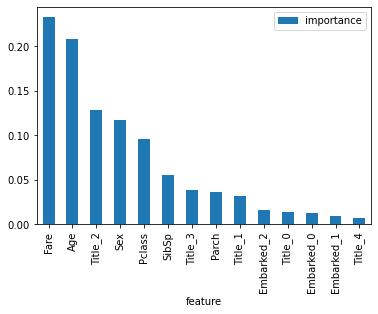

In [54]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

## Gradient Boosting

Gradient Boosting veya GBM, hem regresyon hem de sınıflandırma problemleri için çalışan başka bir toplu makine öğrenme algoritmasıdır. GBM, güçlü bir öğrenci oluşturmak için bir dizi zayıf öğrenciyi birleştiren boosting tekniğini kullanır. Temel öğrenci olarak kullanılan regresyon ağaçları, ardışık her ağaç, bir önceki ağaç tarafından hesaplanan hatalar üzerine inşa edilir.


GBM algoritmasını anlamak için basit bir örnek kullanacağız. Aşağıdaki verileri kullanarak bir grup insanın yaşını tahmin edelim:

![title](gbm1.png)

1. Ortalama yaş , veri kümesindeki tüm gözlemler için tahmin edilen değer olduğu varsayılır.
2. Hatalar, bu ortalama yaş ve gerçek yaş değerleri kullanılarak hesaplanır.

![title](gbm2.png)

3. Hedef değişken olarak yukarıda hesaplanan hatalar kullanılarak bir ağaç modeli oluşturulur. Amacımız, hatayı en aza indirmek için en iyi ayrımı bulmaktır.

4. Bu modelin tahminleri prediction 1 sütununda toplanmıştır.

![title](gbm3.png)

5. Yukarıda hesaplanan bu değer yeni tahmindir.
6. Bu tahmin edilen değer ve gerçek değer kullanılarak yeni hatalar hesaplanır.

![title](gbm4.png)

7. Maksimum yineleme sayısına ulaşılıncaya kadar (veya hata işlevi değişmeyene) kadar 2'den 6'ya kadar olan adımlar tekrarlanır.

### Kod:

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train, y_train)
acc_gbm = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.8324

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       106
           1       0.85      0.71      0.78        73

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix: 
 [[97  9]
 [21 52]]



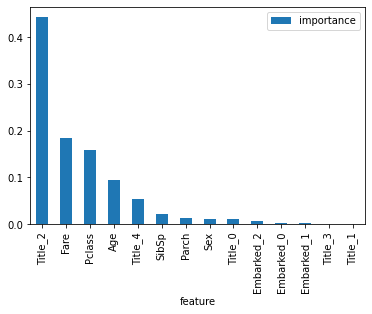

In [56]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

## XGBoost

XGBoost (Extreme Gradient Boosting), gradient boosting algoritmasının gelişmiş bir uygulamasıdır. XGBoost, makine öğrenimi yarışmalarında ve hackathonlarda yaygın olarak kullanılan oldukça etkili bir makine öğrenimi algoritmasıdır. XGBoost, yüksek tahmin gücüne sahiptir ve diğer gradient boosting tekniklerinden neredeyse 10 kat daha hızlıdır. Ayrıca, yüksek varyansı azaltan ve genel performansı artıran çeşitli düzenlemeler içerir. Bu nedenle, "regularized boosting" tekniği olarak da bilinir.

XGBoost'un diğer tekniklerden neden nispeten daha iyi olduğuna bakalım:


##### 1. Düzenlilik

- Standart GBM uygulamasının XGBoost gibi bir düzenlenmesi yoktur.
- Böylelikle XGBoost, aşırı öğrenmeyi azaltmaya da yardımcı olur.

##### 2. Paralel İşleme

- XGBoost paralel işlemeyi uygular ve GBM'den daha hızlıdır.
- XGBoost ayrıca Hadoop'ta uygulamayı destekler.

##### 3. Yüksek Eskenlik

- XGBoost, kullanıcıların modele yepyeni bir boyut ekleyerek özel optimizasyon hedeflerini ve değerlendirme kriterlerini tanımlamalarına olanak tanır.

##### 4. Eksik Değerleri Ele Alma

- XGBoost, eksik değerlerin üstesinden gelmek için yerleşik özelliğe sahiptir.

##### 5. Ağaç Budama

- XGBoost, belirtilen maksimum derinliğe kadar bölmeler yapar ve ardından ağacı geriye doğru budamaya başlar ve ötesinde pozitif kazanım olmayan bölmeleri kaldırır.

##### 6. Yerleşik Çapraz Doğrulama (Cross-Validation)

- XGBoost, bir kullanıcının artırma işleminin her yinelemesinde bir çapraz doğrulama çalıştırmasına olanak tanır ve böylece tek bir çalıştırmada tam olarak optimum sayıda yükseltme yinelemesi elde etmek kolaydır.

### Kod:

In [57]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.1,subsample=0.3,min_child_weight=2,max_depth=4)
model.fit(X_train, y_train)
acc_xgb = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.8101

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.85       106
           1       0.84      0.66      0.74        73

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix: 
 [[97  9]
 [25 48]]



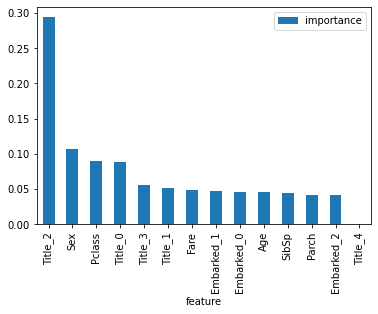

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

## LightGBM

Light GBM'nin nasıl çalıştığını tartışmadan önce, bu kadar çok algoritmaya sahip olduğumuz halde neden bu algoritmaya ihtiyacımız olduğunuz anlayalım. Light GBM, veri kümesi çok büyük olduğunda en çok tercih edilen algoritmadır. Diğer algoritmalarla karşılaştırıldığında, Light GBM'in büyük bir veri kümesinde çalışması daha az zaman alır.

In [59]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train,y_train)
acc_lgb = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Test Sonuçları:

accuracy score: 0.7877

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       106
           1       0.82      0.62      0.70        73

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179


Confusion Matrix: 
 [[96 10]
 [28 45]]



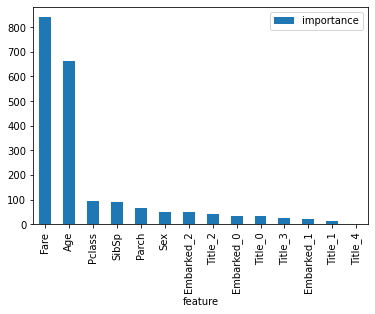

In [60]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

## CatBoost

Kategorik değişkenleri ele almak, özellikle çok sayıda bu tür değişkenlere sahip olduğunuzda sıkıcı bir süreçtir. Kategorik değişkenleriniz çok fazla etikete sahip olduğunda (yani bunlar çok önemliyse), üzerlerinde one-hot-encoding yapmak katlanarak boyutluluğu artırır ve veri kümesiyle çalışmak gerçekten zor hale gelir.

CatBoost, kategorik değişkenlerle otomatik olarak ilgilenebilir ve diğer makine öğrenimi algoritmaları gibi kapsamlı veri ön işlemesi gerektirmez. 

In [61]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
model.fit(X_train,y_train)
acc_cat = model.score(X_test,y_test)
print_score(model,X_train, y_train, X_test, y_test)

Learning rate set to 0.007881
0:	learn: 0.6869339	total: 179ms	remaining: 2m 58s
1:	learn: 0.6814352	total: 180ms	remaining: 1m 30s
2:	learn: 0.6763111	total: 182ms	remaining: 1m
3:	learn: 0.6712485	total: 183ms	remaining: 45.6s
4:	learn: 0.6677466	total: 184ms	remaining: 36.6s
5:	learn: 0.6649968	total: 185ms	remaining: 30.6s
6:	learn: 0.6591619	total: 186ms	remaining: 26.4s
7:	learn: 0.6541660	total: 187ms	remaining: 23.2s
8:	learn: 0.6501075	total: 188ms	remaining: 20.7s
9:	learn: 0.6450524	total: 190ms	remaining: 18.8s
10:	learn: 0.6396774	total: 191ms	remaining: 17.2s
11:	learn: 0.6343361	total: 192ms	remaining: 15.8s
12:	learn: 0.6291343	total: 194ms	remaining: 14.7s
13:	learn: 0.6250985	total: 195ms	remaining: 13.8s
14:	learn: 0.6212028	total: 197ms	remaining: 12.9s
15:	learn: 0.6170359	total: 198ms	remaining: 12.2s
16:	learn: 0.6120818	total: 199ms	remaining: 11.5s
17:	learn: 0.6074254	total: 201ms	remaining: 10.9s
18:	learn: 0.6042157	total: 202ms	remaining: 10.4s
19:	learn: 0

288:	learn: 0.3391078	total: 495ms	remaining: 1.22s
289:	learn: 0.3389093	total: 496ms	remaining: 1.21s
290:	learn: 0.3386576	total: 497ms	remaining: 1.21s
291:	learn: 0.3385004	total: 498ms	remaining: 1.21s
292:	learn: 0.3383693	total: 499ms	remaining: 1.2s
293:	learn: 0.3381678	total: 500ms	remaining: 1.2s
294:	learn: 0.3379514	total: 501ms	remaining: 1.2s
295:	learn: 0.3375961	total: 502ms	remaining: 1.19s
296:	learn: 0.3372951	total: 503ms	remaining: 1.19s
297:	learn: 0.3371168	total: 505ms	remaining: 1.19s
298:	learn: 0.3369695	total: 506ms	remaining: 1.19s
299:	learn: 0.3367523	total: 507ms	remaining: 1.18s
300:	learn: 0.3365992	total: 509ms	remaining: 1.18s
301:	learn: 0.3364605	total: 510ms	remaining: 1.18s
302:	learn: 0.3362488	total: 511ms	remaining: 1.18s
303:	learn: 0.3360246	total: 513ms	remaining: 1.17s
304:	learn: 0.3359261	total: 514ms	remaining: 1.17s
305:	learn: 0.3357735	total: 515ms	remaining: 1.17s
306:	learn: 0.3354919	total: 516ms	remaining: 1.16s
307:	learn: 0.3

587:	learn: 0.2964541	total: 805ms	remaining: 564ms
588:	learn: 0.2963067	total: 807ms	remaining: 563ms
589:	learn: 0.2961962	total: 808ms	remaining: 561ms
590:	learn: 0.2961603	total: 809ms	remaining: 560ms
591:	learn: 0.2961469	total: 809ms	remaining: 558ms
592:	learn: 0.2960685	total: 810ms	remaining: 556ms
593:	learn: 0.2958687	total: 812ms	remaining: 555ms
594:	learn: 0.2957421	total: 813ms	remaining: 553ms
595:	learn: 0.2956312	total: 814ms	remaining: 552ms
596:	learn: 0.2955434	total: 816ms	remaining: 551ms
597:	learn: 0.2952732	total: 817ms	remaining: 549ms
598:	learn: 0.2952468	total: 818ms	remaining: 547ms
599:	learn: 0.2950704	total: 819ms	remaining: 546ms
600:	learn: 0.2948845	total: 820ms	remaining: 544ms
601:	learn: 0.2947693	total: 821ms	remaining: 543ms
602:	learn: 0.2945863	total: 822ms	remaining: 541ms
603:	learn: 0.2944739	total: 824ms	remaining: 540ms
604:	learn: 0.2943475	total: 825ms	remaining: 539ms
605:	learn: 0.2942942	total: 826ms	remaining: 537ms
606:	learn: 

847:	learn: 0.2676156	total: 1.1s	remaining: 198ms
848:	learn: 0.2675713	total: 1.1s	remaining: 197ms
849:	learn: 0.2675368	total: 1.11s	remaining: 195ms
850:	learn: 0.2674520	total: 1.11s	remaining: 194ms
851:	learn: 0.2674319	total: 1.11s	remaining: 193ms
852:	learn: 0.2673353	total: 1.11s	remaining: 191ms
853:	learn: 0.2671294	total: 1.11s	remaining: 190ms
854:	learn: 0.2670178	total: 1.11s	remaining: 189ms
855:	learn: 0.2669397	total: 1.11s	remaining: 187ms
856:	learn: 0.2668316	total: 1.11s	remaining: 186ms
857:	learn: 0.2667824	total: 1.11s	remaining: 184ms
858:	learn: 0.2666784	total: 1.11s	remaining: 183ms
859:	learn: 0.2665943	total: 1.12s	remaining: 182ms
860:	learn: 0.2665080	total: 1.12s	remaining: 180ms
861:	learn: 0.2664401	total: 1.12s	remaining: 179ms
862:	learn: 0.2663388	total: 1.12s	remaining: 178ms
863:	learn: 0.2662377	total: 1.12s	remaining: 176ms
864:	learn: 0.2661083	total: 1.12s	remaining: 175ms
865:	learn: 0.2659152	total: 1.12s	remaining: 174ms
866:	learn: 0.

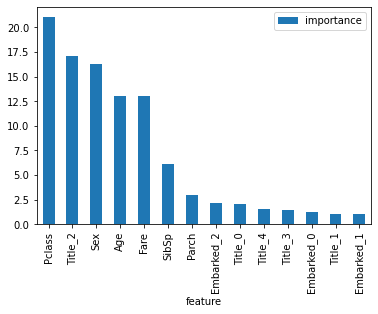

In [62]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
plt.show()

In [64]:
results = pd.DataFrame({
    'Model': ['Bagging-Meta Estimator', 'Random Forest', 'GBM', 
              'XGBoost','LGBM','CatBoost'],
    'Score': [acc_bag, acc_rf,acc_gbm,acc_xgb,acc_lgb,acc_cat]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.reset_index(inplace=True)
result_df.head(9)

Score                   Model
0  0.832402                     GBM
1  0.815642                CatBoost
2  0.810056                 XGBoost
3  0.793296           Random Forest
4  0.787709                    LGBM
5  0.754190  Bagging-Meta Estimator

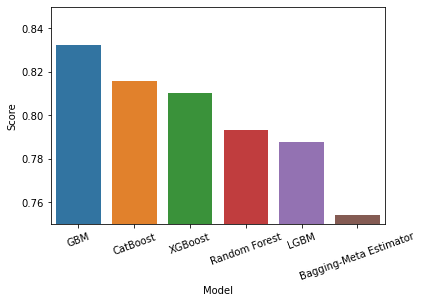

In [65]:
import seaborn as sns
sns.barplot(x='Model',y='Score',data =result_df)
plt.ylim(0.75,0.85)
plt.xticks(rotation=20)
plt.show()

## Sonuç:
Çeşitli topluluk öğrenme tekniklerini ele aldık ve bu tekniklerin makine öğrenimi algoritmalarında nasıl uygulandığını gördük. Ayrıca, titanic veri setimize ön işleme,kayıp veri analizi yaparak ardından bu algoritmaları uyguladık. Ekrandaki bar grafiğinde hangi modelin test seti üzerinde daha başarılı olduğunu gözlemleyebiliriz. Bu durumda GBM modelimiz en başarılı modeldir. XGBoost LightGBM gibi algoritmaların GBM'in büyük veri setlerindeki yavaşlığı ve düşük accuracy skoru yüzünden geliştirildiğini biliyoruz. Bu durumda bizim veri setimizdeki gözlem sayısı az olduğu için GBM algoritmasının daha başarılı çıkması da normaldir.


# Kaynaklar

https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789136609/2/ch02lvl1sec16/max-voting
https://xgboost.readthedocs.io/en/latest/R-package/discoverYourData.html
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
https://www.veribilimiokulu.com/blog/gradient-boosted-regresyon-agaclari/
https://www.veribilimiokulu.com/blog/xgboost-nasil-calisir/
https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/
https://medium.com/deep-learning-turkiye/xgboost-dosyalar%C4%B1-25d31fda6900